In [1]:
import nltk 

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
messages = [line.rstrip() for line in open('/..../smsspamcollection/SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
messages[5]

"spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"

In [7]:
 for message_no, message in enumerate(messages[:7]):
        print(message_no,message)
        print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.




In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

In [13]:
messages = pd.read_csv('/..../SMSSpamCollection', 
                       sep='\t', names=['label', 'message'])

messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [15]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [16]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [17]:
messages['length']=messages['message'].apply(len)

messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
messages.groupby('label')['length'] .describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,4825.0,71.482487,58.440652,2.0,33.0,52.0,93.0,910.0
spam,747.0,138.670683,28.873603,13.0,133.0,149.0,157.0,223.0


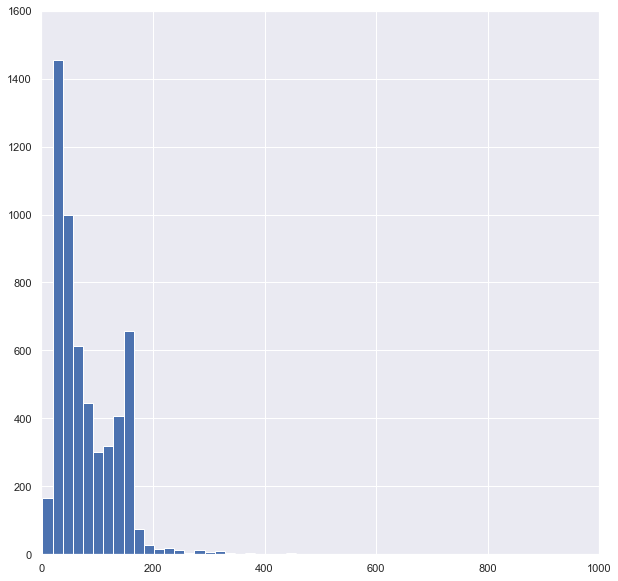

In [26]:
plt.figure(figsize=(10,10))

messages['length'].hist(bins=50)
#plt.xlim(0,1000)
plt.axis([0,1000, 0,1600])
plt.show()

In [28]:
messages[messages['length']>900]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [29]:
messages[messages['length']>900]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

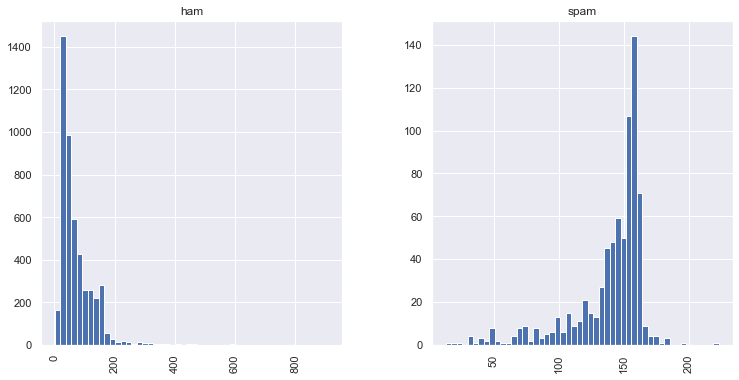

In [32]:
messages.hist(column='length', by='label', bins=50, figsize=(12,6))

plt.show()

In [33]:
import string 

mess ='Sample message! Notice: it has punctuation'

nopunc = [char for char in mess if char not in string.punctuation]

nopunc = ''.join(nopunc)

In [34]:
from nltk.corpus import stopwords

stopwords.words('english')[0:10]


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [35]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [36]:
clean_mess =[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [37]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [56]:
def text_process(mess):
    
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
        
    nopunc = ''.join(nopunc)
        
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
        

In [57]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [58]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [59]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
bow_transformer =CountVectorizer(analyzer=text_process).fit(messages['message'])

print(len(bow_transformer.vocabulary_))

11425


In [62]:
message10=messages['message'][9]

print(message10)

Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030


In [63]:
bow10=bow_transformer.transform([message10])

print(bow10)

print(bow10.shape)

  (0, 58)	1
  (0, 315)	1
  (0, 1417)	1
  (0, 1492)	1
  (0, 1865)	1
  (0, 1941)	1
  (0, 2852)	1
  (0, 3321)	1
  (0, 4068)	1
  (0, 4128)	2
  (0, 5304)	1
  (0, 5594)	1
  (0, 6328)	1
  (0, 7716)	1
  (0, 8216)	1
  (0, 8217)	1
  (0, 8251)	1
(1, 11425)


In [48]:
print(bow_transformer.get_feature_names()[4128])

Update


In [64]:
messages_bow = bow_transformer.transform(messages['message'])

In [65]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [66]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [68]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf10 = tfidf_transformer.transform(bow10)
print(tfidf10)

  (0, 8251)	0.24241519917488308
  (0, 8217)	0.24860464952517933
  (0, 8216)	0.16878018627985983
  (0, 7716)	0.2113089707557115
  (0, 6328)	0.2521814272360164
  (0, 5594)	0.22507369610987876
  (0, 5304)	0.22183810709807938
  (0, 4128)	0.48483039834976616
  (0, 4068)	0.13464474024308146
  (0, 3321)	0.20511952040541523
  (0, 2852)	0.21019582218498448
  (0, 1941)	0.19606801326497764
  (0, 1865)	0.17217781851006528
  (0, 1492)	0.2561799245290503
  (0, 1417)	0.15512340375049818
  (0, 315)	0.24860464952517933
  (0, 58)	0.2894771060054842


In [77]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['dun']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['Update']])

5.819026297799216
7.140782137781536


In [78]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


In [80]:
from sklearn.naive_bayes import MultinomialNB

spam_detect_model= MultinomialNB().fit(messages_tfidf, messages['label'])

In [81]:
print('predicted:', spam_detect_model.predict(tfidf10)[0])
print('expected:', messages.label[9])

predicted: spam
expected: spam


In [83]:
all_predictions = spam_detect_model.predict(messages_tfidf)

print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [84]:
from sklearn.metrics import classification_report

print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [85]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.3)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

3900 1672 5572


In [86]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [87]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x1a278c8730>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [88]:
predictions = pipeline.predict(msg_test)

In [89]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.97      1507
        spam       0.67      1.00      0.80       165

    accuracy                           0.95      1672
   macro avg       0.84      0.97      0.89      1672
weighted avg       0.97      0.95      0.96      1672

